EVALUACIÓN FINAL: ANÁLISIS DE PREFERENCIAS MUSICALES A NIVEL GLOBAL

Trabajas en un centro de investigación de tendencias culturales y te han encargado un análisis sobre las preferencias musicales en distintos países. Tu tarea es aplicar técnicas de aprendizaje de máquina no supervisado para extraer patrones de escucha y agrupar países según sus similitudes en consumo musical.

OBJETIVOS DE LA EVALUACIÓN
- Aplicar clusterización para encontrar grupos de países con patrones de escucha similares.
- Utilizar reducción de dimensionalidad para visualizar la estructura de los datos.
- Evaluar diferentes algoritmos y justificar sus ventajas y desventajas.
- Interpretar los resultados en un contexto cultural y social.

Pregunta 1. Carga y exploración de datos (1 punto)
- Carga el dataset proporcionado, que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.
- Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

       País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0     Chile   71    22       79           61       70    58        79     69
1      EEUU   34    41       40           79       74    37        90     23
2    México   91    72       52           99       83    23        63     21
3     Corea   80    21       95           34       22    79        27     25
4     Japón   40    49       77           81       70    33        66     73
5  Alemania   94    57       41           81       26    28        54     23
6     Rusia   94    21       68           66       40    72        97     73
7    Italia   43    83       78           81       92    21        55     82

Descripción estadística:
             Pop       Rock    Hip-Hop  Electrónica    Clásica       Jazz  \
count   8.000000   8.000000   8.000000     8.000000   8.000000   8.000000   
mean   68.375000  45.750000  66.250000    72.750000  59.625000  43.875000   
std    25.628876  23.980647  19.912308    19.33723

,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
Pop,1.000000,-0.226920,-0.072152,-0.146218,-0.598758,0.347110,-0.136140,-0.309617
Rock,-0.226920,1.000000,-0.334623,0.767552,0.577480,-0.914631,-0.225989,-0.015458
Hip-Hop,-0.072152,-0.334623,1.000000,-0.681361,-0.095324,0.547944,-0.421839,0.516527
Electrónica,-0.146218,0.767552,-0.681361,1.000000,0.624451,-0.885079,0.340552,-0.029056
Clásica,-0.598758,0.577480,-0.095324,0.624451,1.000000,-0.623878,0.316273,0.350351
Jazz,0.347110,-0.914631,0.547944,-0.885079,-0.623878,1.000000,0.007148,0.062558
Reguetón,-0.136140,-0.225989,-0.421839,0.340552,0.316273,0.007148,1.000000,0.311957
Metal,-0.309617,-0.015458,0.516527,-0.029056,0.350351,0.062558,0.311957,1.000000


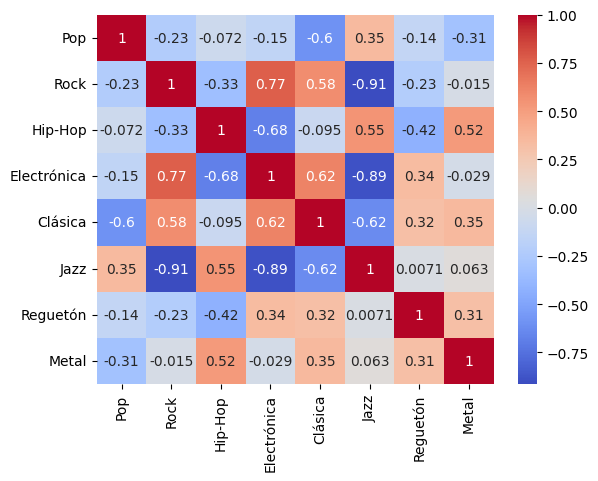

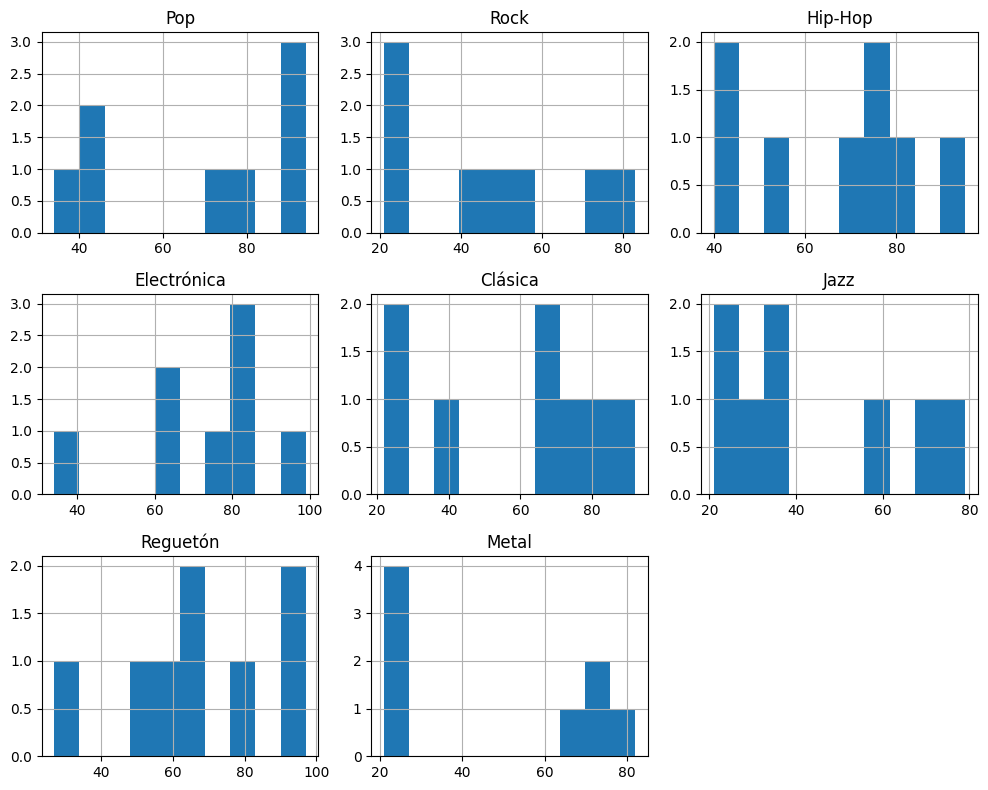

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv('/content/sample_data/dataset_generos_musicales.csv')
print(df.head(10))

print("\nDescripción estadística:")
print(df.describe())

df_num = df.drop('País', axis=1)

# Matriz de correlación
correlation_matrix = df_num.corr()
display(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribución de datos
df_num.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Pregunta 2. Aplicación de algoritmos de clusterización (5 puntos)
- K-Means:
  - Aplica el algoritmo K-Means con un valor inicial de K=3.
  - Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.

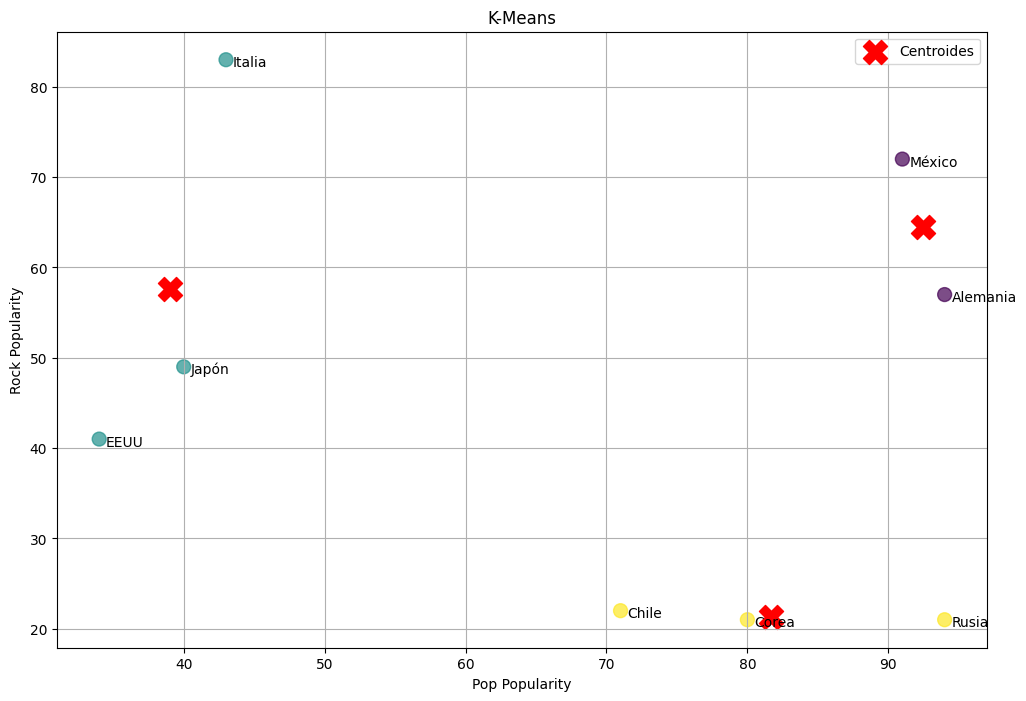

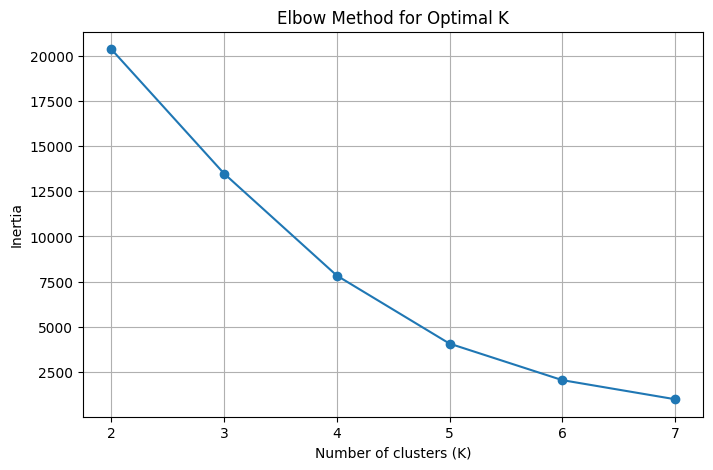

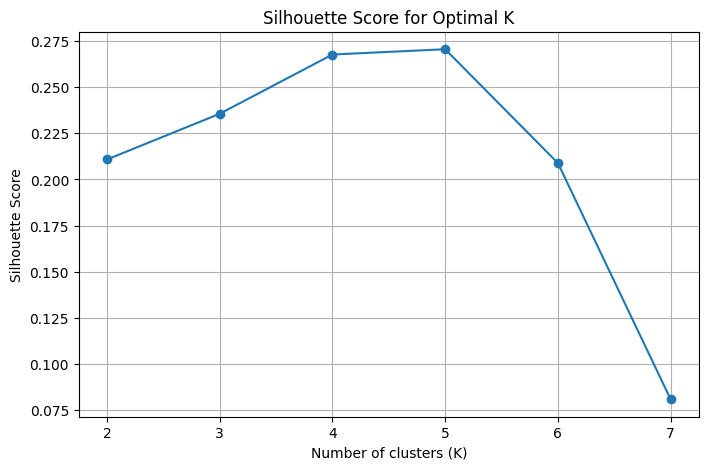

In [28]:
#### KMeans ####

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_num)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Pop'], df['Rock'], c=df['Cluster'], cmap='viridis', alpha=0.7, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=300, label='Centroides')
plt.xlabel('Pop Popularity')
plt.ylabel('Rock Popularity')
plt.title('K-Means')
plt.legend()

for i, country in enumerate(df['País']):
    plt.annotate(country, (df['Pop'][i], df['Rock'][i]), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=10)

plt.grid(True)
plt.show()

# Evaluación cantidad de clusters

inertia = []
silhouette_scores = []
k_range = range(2, len(df_num))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Add n_init
    kmeans.fit(df_num)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_num, kmeans.labels_)
    silhouette_scores.append(score)

# Método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()



- Clustering jerárquico:
  - Genera un dendrograma y determina el número óptimo de clusters.
  - Aplica clustering jerárquico y compara con los resultados de K-Means.


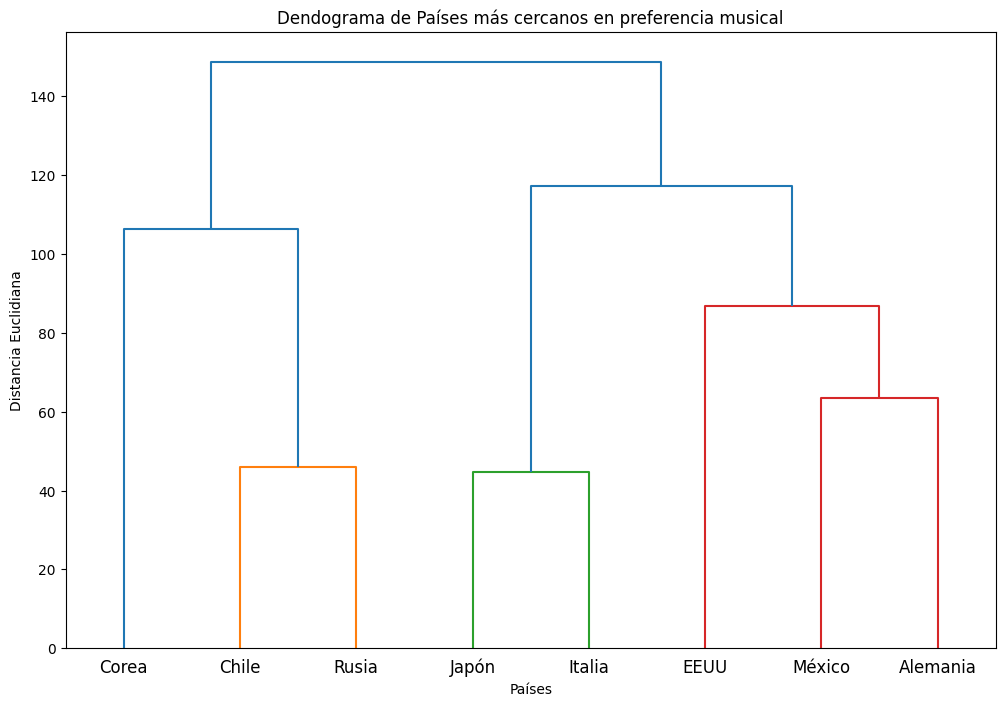


Hierarchical Clusters:
       País  Cluster_Hierarchical
0     Chile                     1
1      EEUU                     0
2    México                     0
3     Corea                     3
4     Japón                     2
5  Alemania                     0
6     Rusia                     1
7    Italia                     2


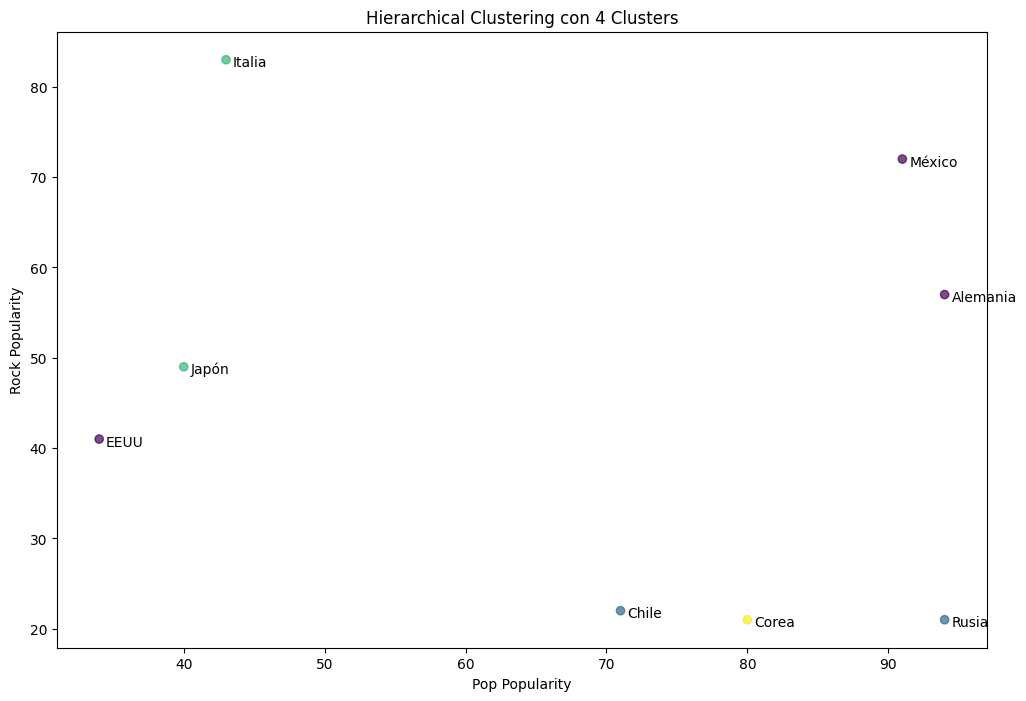

In [38]:
#### Clustering (Dendograma) #####

plt.figure(figsize=(12, 8))
plt.title("Dendograma de Países más cercanos en preferencia musical")
dend = shc.dendrogram(shc.linkage(df_numeric, method='ward'), labels=df['País'].tolist())
plt.xlabel("Países")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Aplicación de Hierarchical Clustering basado en el dendograma
num_clusters = 4
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward') # Removed affinity='euclidean'
df['Cluster_Hierarchical'] = hierarchical_clustering.fit_predict(df_numeric)

#Comparación KMeans
if 'Cluster_Optimal_KMeans' in df.columns:
    print("\nK-Means Clusters (Optimal K):")
    print(df[['País', 'Cluster_Optimal_KMeans']])

print("\nHierarchical Clusters:")
print(df[['País', 'Cluster_Hierarchical']])

plt.figure(figsize=(12, 8))
plt.scatter(df['Pop'], df['Rock'], c=df['Cluster_Hierarchical'], cmap='viridis', alpha=0.7)
plt.xlabel('Pop Popularity')
plt.ylabel('Rock Popularity')
plt.title(f'Hierarchical Clustering con {num_clusters} Clusters')

#Agregar etiquetas de países
for i, country in enumerate(df['País']):
    plt.annotate(country, (df['Pop'][i], df['Rock'][i]), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=10)

plt.show()

- DBSCAN:
  - Aplica DBSCAN con diferentes valores de eps y MinPts.
  - Justifica la elección de los parámetros y analiza si DBSCAN identifica agrupaciones significativas.

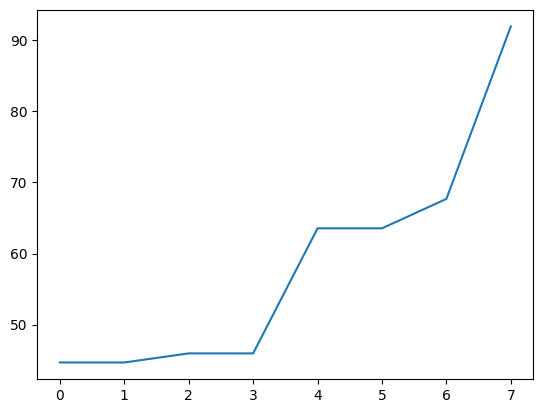


DBSCAN Clusters:
       País  Cluster_DBSCAN
0     Chile               0
1      EEUU               1
2    México               2
3     Corea               3
4     Japón               0
5  Alemania               2
6     Rusia               0
7    Italia               0


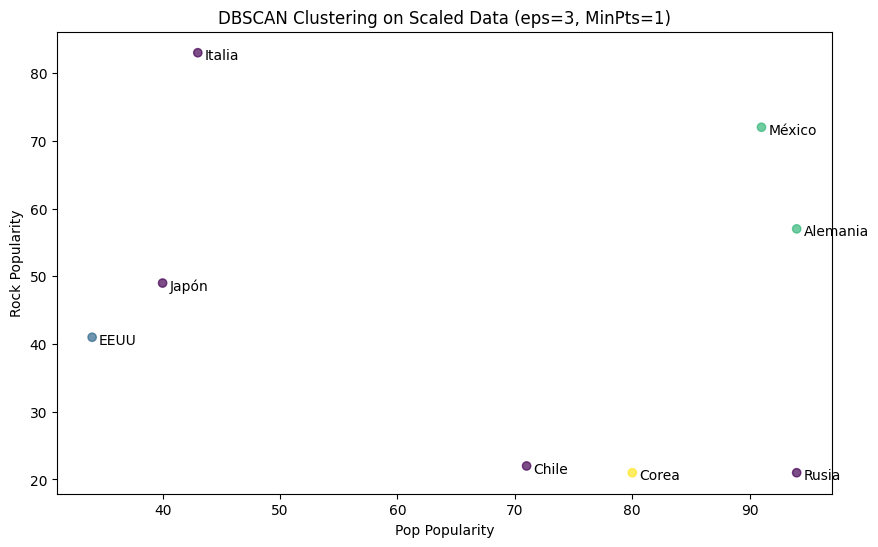

In [65]:
#### DBSCAN ####

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# índice para seleccionar número de eps
neigh.fit (df_num)
distances, indices = neigh.kneighbors(df_num)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

# Normalización de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

eps_value = 3
min_samples_value = 1

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled) # Use scaled data

print("\nDBSCAN Clusters:")
print(df[['País', 'Cluster_DBSCAN']])

plt.figure(figsize=(10, 6))
plt.scatter(df['Pop'], df['Rock'], c=df['Cluster_DBSCAN'], cmap='viridis', alpha=0.7)
plt.xlabel('Pop Popularity')
plt.ylabel('Rock Popularity')
plt.title(f'DBSCAN Clustering on Scaled Data (eps={eps_value}, MinPts={min_samples_value})')

for i, country in enumerate(df['País']):
    plt.annotate(country, (df['Pop'][i], df['Rock'][i]), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=10)

plt.show()



Pregunta 3. Aplicación de reducción de dimensionalidad (3 puntos)
PCA:
- Aplica PCA y determina cuántos componentes principales explican al menos el 90% de la varianza.
- Visualiza los países en un gráfico bidimensional con las primeras dos componentes principales.
t-SNE:
- Aplica t-SNE para visualizar la relación entre los países en un espacio de 2D.
- Experimenta con diferentes valores de perplexity y analiza cómo afectan la representación.

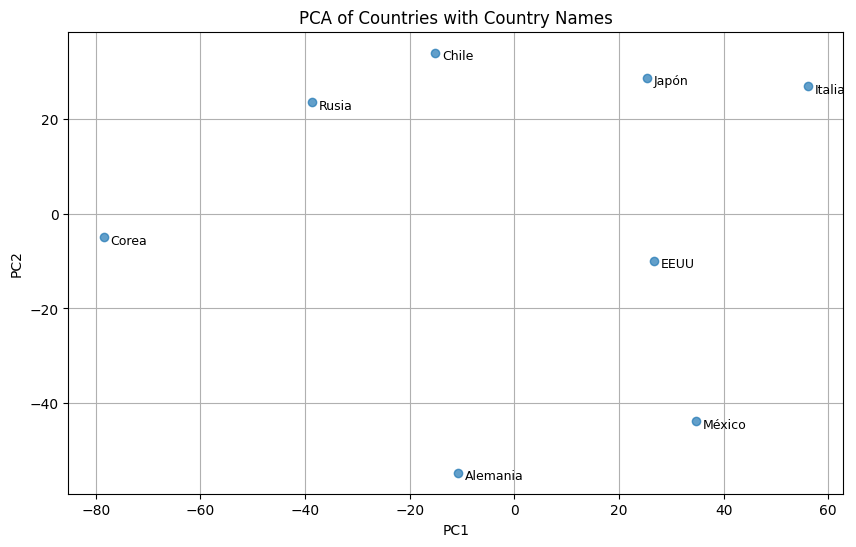


Varianza explicada por cada componente principal:
[0.43672826 0.26482777 0.15106609 0.09945255]


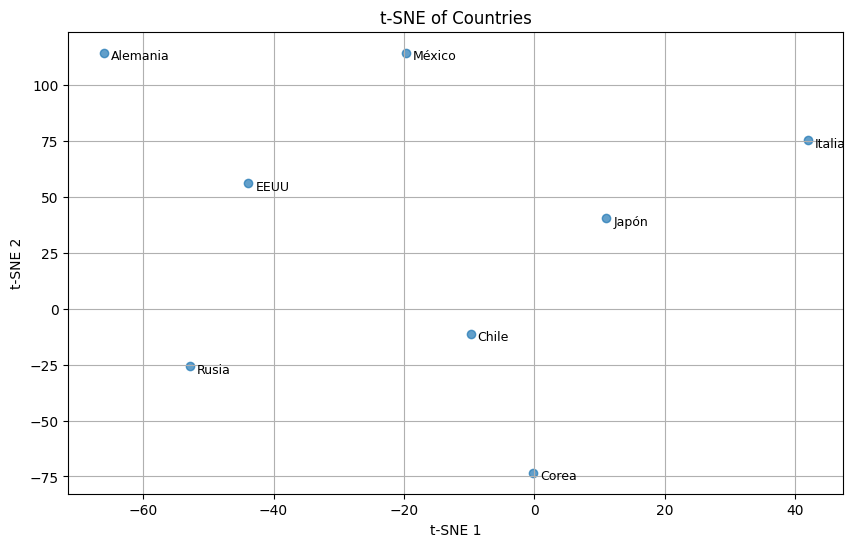

In [74]:
#### PCA ####

pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_num)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Countries with Country Names') # Updated title

# Add country names to the plot
for i, country in enumerate(df['País']):
    plt.annotate(country, (df_pca[i, 0], df_pca[i, 1]), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=9) # Added text annotations

plt.grid(True) # Added grid for better readability
plt.show()


explained_variance = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente principal:")
print(explained_variance)


#### t-SNE ####

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Fix: perplexity must be less than the number of samples (8 countries)
tsne = TSNE(n_components=2, perplexity=5, random_state=42) # Changed perplexity to 5
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("t-SNE of Countries") # Updated title

# Add country names to the t-SNE plot as well
for i, country in enumerate(df['País']):
    plt.annotate(country, (df_tsne[i, 0], df_tsne[i, 1]), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=9) # Added text annotations

plt.grid(True) # Added grid for better readability
plt.show()

Pregunta 4. Análisis de resultados y conclusiones (1 punto)
- Comparación de métodos:
  - Explica las diferencias entre K-Means, clustering jerárquico y DBSCAN. ¿Cuál funcionó mejor en este caso y por qué?
  - Compara los resultados obtenidos con PCA y t-SNE. ¿Cuál técnica permitió visualizar mejor la relación entre los países?
- Interpretación:
  - ¿Los clusters obtenidos reflejan similitudes culturales o geográficas en la música?
  - Relaciona los resultados con tendencias globales en consumo musical.

**Respuesta**

- Comparación de métodos

En el caso de este estudio, el análisis de K Means y el Cluster jerárquicos, parecen más claros que los resultados de DBSCAN, donde los resultados variaban mucho si no se aplicaban epsilon o min level de manera apropiada.

El método del codo y de la silueta ayudaron a determinar los centroides de KMeans, donde se optó por 3, por la disposición de los países en la figura, y por la silueta especialmente donde no había gran diferencia entre 3 a 4 centroides.

Los clustering resultaron también enclarecedores para conocer las relaciones entre las preferencias musicales, mostrando además consistencia con el análisis KMeans, salvo por el caso de Corea, que se reconocía como un 4to grupo para estos métodos.

- Interpretación

Los resultados no parecen mostrar algún resultado predecible tanto en distancias geográficas como en cultura, salvo quizá por el caso del grupo de EEUU y México que comparten fronteras, el resto de los grupos contenían países de distintos continentes.

